In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/120dog breeds-299.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/projectDataset229')

In [ ]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D, BatchNormalization

In [ ]:
import pathlib
from keras.preprocessing.image import ImageDataGenerator


data_dir = pathlib.Path('/content/projectDataset229/120dog breeds-299')

data_train = data_dir / 'train'

test_dir = data_dir / 'test'


labels_csv = pd.read_csv('/content/drive/MyDrive/labels.csv')
labels_csv['id'] = [str(fname) + '.jpg' for fname in labels_csv['id']]

In [ ]:
batch_size = 16
img_size = 299

In [ ]:
# datagen = ImageDataGenerator(preprocessing_function = keras.applications.inception_v3.preprocess_input, validation_split=0.2)
# train_generator = datagen.flow_from_dataframe(
#                         dataframe = labels_csv,
#                         directory = data_train,
#                         subset='training',
#                         x_col='id',
#                         y_col='breed',
#                         batch_size=batch_size,
#                         shuffle=True,
#                         class_mode='sparse',
#                         color_mode='rgb',
#                         target_size=(img_size, img_size))

# validation_generator = datagen.flow_from_dataframe(
#                         dataframe = labels_csv,
#                         directory = data_train,
#                         subset='validation',
#                         x_col='id',
#                         y_col='breed',
#                         batch_size=batch_size,
#                         shuffle=True,
#                         class_mode='sparse',
#                         color_mode='rgb',
#                         target_size=(img_size, img_size))

# train_datagen = ImageDataGenerator(
#     preprocessing_function = keras.applications.inception_v3.preprocess_input, 
#     validation_split=0.2,
#     rotation_range=20, 
#     width_shift_range=0.2, 
#     height_shift_range=0.2, 
#     zoom_range=0.2, 
#     horizontal_flip=True, 
#     vertical_flip=True
# )


train_datagen = ImageDataGenerator(
    preprocessing_function=keras.applications.inception_v3.preprocess_input,
    validation_split=0.2,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.05,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)


train_generator = train_datagen.flow_from_dataframe(
    dataframe=labels_csv,
    directory=data_train,
    subset='training',
    x_col='id',
    y_col='breed',
    batch_size=batch_size,
    shuffle=True,
    class_mode='sparse',
    color_mode='rgb',
    target_size=(img_size, img_size)
)

validation_datagen = ImageDataGenerator(
    preprocessing_function = keras.applications.inception_v3.preprocess_input, 
    validation_split=0.2
)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=labels_csv,
    directory=data_train,
    subset='validation',
    x_col='id',
    y_col='breed',
    batch_size=batch_size,
    shuffle=True,
    class_mode='sparse',
    color_mode='rgb',
    target_size=(img_size, img_size)
)


Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [ ]:
# base = applications.inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(224,224,3))

base = applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))


for layer in base.layers:
    layer.trainable=False

model = Sequential()
model.add(base)
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))
model.summary()

optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 batch_normalization_94 (Bat  (None, 8, 8, 2048)       8192      
 chNormalization)                                                
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                         

In [ ]:
history_inc = model.fit(train_generator, epochs=50, verbose = 1,
                        validation_data=validation_generator)

# from keras.callbacks import ModelCheckpoint, EarlyStopping

# checkpoint_cb = ModelCheckpoint("E://dx//Level 6//Project//Topic-Ensemble Model for the Classification of Dog Breed//Codes//Saved Model//InceptionV3-299-Epoch50DataAugmentationHigh.h5", save_best_only=True)
# early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)

# history_inc = model.fit(train_generator, epochs=50, verbose = 1,
#                         validation_data=validation_generator,
#                         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
512/512 [==============================] - 212s 414ms/step - loss: 0.3624 - accuracy: 0.8866 - val_loss: 0.3413 - val_accuracy: 0.8958
Epoch 2/50
512/512 [==============================] - 205s 401ms/step - loss: 0.3398 - accuracy: 0.8920 - val_loss: 0.3403 - val_accuracy: 0.8943
Epoch 3/50
512/512 [==============================] - 206s 402ms/step - loss: 0.3160 - accuracy: 0.8983 - val_loss: 0.3454 - val_accuracy: 0.8968
Epoch 4/50
512/512 [==============================] - 207s 404ms/step - loss: 0.3094 - accuracy: 0.8990 - val_loss: 0.3483 - val_accuracy: 0.8943
Epoch 5/50
512/512 [==============================] - 211s 412ms/step - loss: 0.2923 - accuracy: 0.9051 - val_loss: 0.3532 - val_accuracy: 0.8948
Epoch 6/50
512/512 [==============================] - 211s 412ms/step - loss: 0.2791 - accuracy: 0.9056 - val_loss: 0.3520 - val_accuracy: 0.8909
Epoch 7/50
512/512 [==============================] - 210s 411ms/step - loss: 0.2744 - accuracy: 0.9083 - val_loss: 0.3497 -

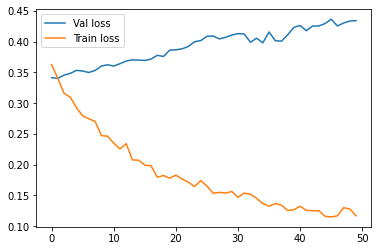

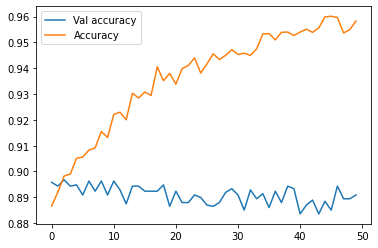

In [ ]:
plt.figure()
plt.plot(history_inc .history['val_loss'], label = 'Val loss')
plt.plot(history_inc .history['loss'], label = 'Train loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(history_inc .history['val_accuracy'], label = 'Val accuracy')
plt.plot(history_inc .history['accuracy'], label = 'Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/InceptionV3-299-Epoch50DataAugmentationHigh.h5')